**Import Library**

In [8]:
import pandas as pd

In [36]:
import numpy as np

In [53]:
import seaborn as sns

In [85]:
from sklearn.metrics import confusion_matrix

In [89]:
from sklearn.model_selection import train_test_split

**Import Data**

In [10]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

**Describe Data**

In [11]:
df .head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [16]:
df.duplicated('CustomerId').sum()

0

In [17]:
df = df.drop_duplicates('CustomerId')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [20]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [21]:
df.replace ({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [22]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [23]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)

In [25]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [26]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace=True)

In [27]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [29]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [31]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()


,count
Churn,
0,3117
1,500


In [37]:
df['Zero Balance'] = np.where(df['Balance']>=0, 1, 0)

**Data Visualization**

<Axes: >

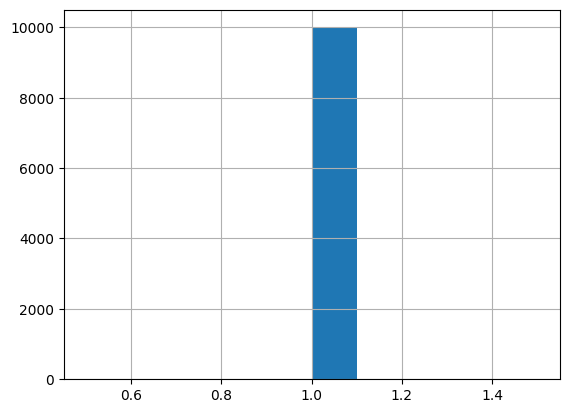

In [38]:
df['Zero Balance'].hist()

In [39]:
df.groupby(['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Data Preprocessing**

In [40]:
df.columns


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [41]:
X = df.drop(['Surname' , 'Churn'], axis=1)

In [42]:
y =df['Churn']

**Define Target Variable (y) and Feature Variables (X)**

In [47]:
X.shape, y.shape

((10000, 12), (10000,))

In [49]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

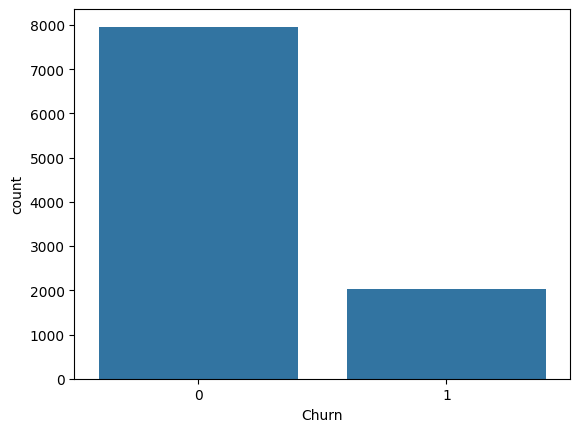

In [54]:
sns.countplot(x ='Churn', data = df)

In [55]:
X.shape, y.shape

((10000, 12), (10000,))

**Random Over sampling**

In [65]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
ros = RandomOverSampler(random_state=2529)

In [68]:
X_ros, y_ros = ros.fit_resample(X, y)

In [69]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [70]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [74]:
X.value_counts()

,,,,,,,,,,,,count
CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance,
15565701,698,0,1,39,9,161993.89,1,0,0,90212.38,1,1
15732281,680,1,0,34,6,146422.22,1,1,0,67142.97,1,1
15732199,837,0,0,31,9,104678.62,1,0,1,50972.60,1,1
15732202,615,2,0,34,1,83503.11,2,1,1,73124.53,1,1
15732235,662,2,0,64,0,98848.19,1,0,1,42730.12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15649297,605,2,1,62,4,111065.93,2,0,1,125660.99,1,1
15649354,754,0,0,35,4,0.00,2,1,1,9658.41,1,1
15649359,587,2,0,36,1,0.00,2,0,1,17135.60,1,1


In [71]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


In [76]:
X_ros.value_counts()

,,,,,,,,,,,,count
CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance,
15701280,576,2,0,24,3,0.00,1,0,1,78498.04,1,12
15717770,850,0,1,55,7,0.00,1,0,0,171762.87,1,10
15650442,644,1,1,32,8,141528.88,1,1,1,167087.34,1,10
15666297,706,0,1,53,3,0.00,3,0,0,88479.02,1,10
15585888,553,0,1,48,3,0.00,1,0,1,30730.95,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
15658668,581,0,0,49,10,0.00,2,0,0,41623.59,1,1
15658614,565,1,1,38,7,145400.69,2,1,1,83844.79,1,1
15658589,850,0,0,38,2,94652.04,1,1,1,171960.76,1,1


<Axes: ylabel='Frequency'>

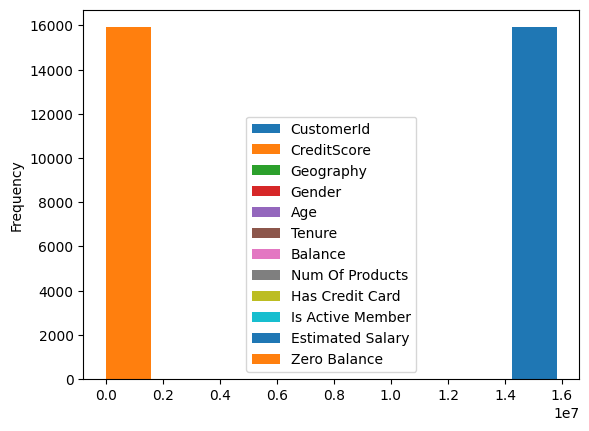

In [77]:
X_ros.plot(kind='hist')

<Axes: ylabel='Frequency'>

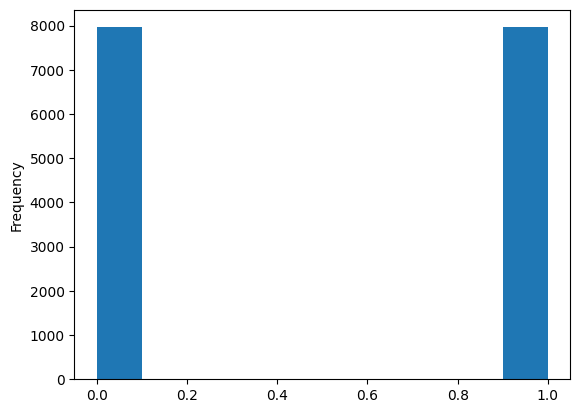

In [72]:
y_ros.plot(kind='hist')

**Train Test Split**

In [56]:
from sklearn.model_selection import train_test_split

**Split original data**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

**Split random under system data**

In [80]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)
#

**Model accuracy**

In [91]:
from sklearn.metrics import confusion_matrix

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()
model.fit(X_train_ros, y_train_ros)
y_pred_ros = model.predict(X_test_ros)

In [100]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1079, 1300],
       [ 770, 1629]])

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.58      0.45      0.51      2379
           1       0.56      0.68      0.61      2399

    accuracy                           0.57      4778
   macro avg       0.57      0.57      0.56      4778
weighted avg       0.57      0.57      0.56      4778



**Prediction**

In [108]:
!pip install joblib

In [109]:
import joblib

In [111]:
from sklearn import externals

In [117]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [118]:
predictions = model.predict(X_test)

In [119]:
print(predictions)

[0 0 0 ... 0 0 0]


**Explaination**

In [120]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [126]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.5.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [129]:
!pip install --upgrade scikit-learn
from sklearn.metrics import classification_report

In [132]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> fbeta_score(y_true, y_pred, average='macro', beta=0.5)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> fbeta_score(y_true, y_pred, average='macro', beta=0.5)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> fbeta_score(y_true, y_pred, average='macro', beta=0.5)
